In [55]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')

# Function to clean and standardize location data
def clean_location(location):
    if pd.isnull(location) or location.strip() == '':
        return None  # Handle missing or empty locations
    location = location.strip().lower()  # Standardize: trim spaces and convert to lowercase
    
    # Handle specific known variations
    # Expand this dictionary based on your dataset
    location_corrections = {
        #'nyc': 'new york city',
        #'sf': 'san francisco',
        # Add more corrections as needed
    }

    return location_corrections.get(location, location)

# Apply the cleaning function to the location column
df['cleaned_location'] = df['location'].apply(clean_location)

# Inspect the cleaned DataFrame
print(df.head())


/var/folders/bg/hdj9jw_j33g1vg7x_rmvr9lc0000gn/T/ipykernel_71226/165545016.py:3: DtypeWarning: Columns (0,4,9,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


  Unnamed: 0         hashed_userid masked_username         location following  \
0          0  13028308852725196659       *****roy1              NaN      9590   
1          1  45494576030177085457     ******eam_6              NaN      8874   
2          2  23641094384211702614     ******erlin  Los Angeles, CA      7730   
3          3  21587659761682762378    ******oshi23           Mumbai       232   
4          4  47915146590553055505    ******4Truth              NaN      6914   

   followers  totaltweets usercreateddt       tweetid retweetcount  ...  \
0     8725.0      29317.0    2012-01-24  1.542763e+18            8  ...   
1    10090.0      33053.0    2019-02-07  1.542763e+18            8  ...   
2    10006.0      35360.0    2008-08-07  1.542763e+18            8  ...   
3      132.0       4970.0    2016-05-10  1.542763e+18          254  ...   
4     6310.0      49958.0    2021-04-02  1.542763e+18            8  ...   

  in_reply_to_status_id is_quote_status quoted_status_id  \
0 

In [56]:
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_lg

import pandas as pd
import spacy

df = pd.read_csv('twitter_data.csv')

# Load spaCy's English language model
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_lg")

# Function to extract locations using spaCy's NER
def extract_locations(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "GPE"]

# Function to clean and standardize location data
def clean_location(location):
    if pd.isnull(location) or location.strip() == '':
        return None  # Handle missing or empty locations
    location = location.strip().lower()  # Standardize: trim spaces and convert to lowercase

    # Here, you can also integrate spaCy's NER results if needed
    # For example, using extract_locations(location) to further process the location

    # Handle specific known variations
    location_corrections = {
        # Add your corrections here
    }

    return location_corrections.get(location, location)

# Load your DataFrame
df = pd.read_csv('twitter_data.csv')

# Apply the cleaning function to the location column
df['cleaned_location'] = df['location'].apply(clean_location)

# New: Extract locations using NER and add to a new column
df['extracted_locations'] = df['location'].apply(lambda x: extract_locations(x) if pd.notnull(x) else x)

# Inspect the cleaned DataFrame
print(df.head())


   Unnamed: 0         hashed_userid masked_username         location  \
0           0  13028308852725196659       *****roy1              NaN   
1           1  45494576030177085457     ******eam_6              NaN   
2           2  23641094384211702614     ******erlin  Los Angeles, CA   
3           3  21587659761682762378    ******oshi23           Mumbai   
4           4  47915146590553055505    ******4Truth              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       9590       8725        29317    2012-01-24  1542763288815030273   
1       8874      10090        33053    2019-02-07  1542763315926994945   
2       7730      10006        35360    2008-08-07  1542763330670014464   
3        232        132         4970    2016-05-10  1542763339738382337   
4       6914       6310        49958    2021-04-02  1542763352279003136   

               tweetcreatedts  ...  language favorite_count is_retweet  \
0  2022-07-01 06:53:25.000000  ...        

In [57]:
# Function to replace empty lists with None
def remove_empty_lists(location_list):
    if location_list:  # This will be False for empty lists
        return location_list
    else:
        return None

df['extracted_locations'] = df['extracted_locations'].apply(remove_empty_lists)
print(df.head())

   Unnamed: 0         hashed_userid masked_username         location  \
0           0  13028308852725196659       *****roy1              NaN   
1           1  45494576030177085457     ******eam_6              NaN   
2           2  23641094384211702614     ******erlin  Los Angeles, CA   
3           3  21587659761682762378    ******oshi23           Mumbai   
4           4  47915146590553055505    ******4Truth              NaN   

   following  followers  totaltweets usercreateddt              tweetid  \
0       9590       8725        29317    2012-01-24  1542763288815030273   
1       8874      10090        33053    2019-02-07  1542763315926994945   
2       7730      10006        35360    2008-08-07  1542763330670014464   
3        232        132         4970    2016-05-10  1542763339738382337   
4       6914       6310        49958    2021-04-02  1542763352279003136   

               tweetcreatedts  ...  language favorite_count is_retweet  \
0  2022-07-01 06:53:25.000000  ...        

In [58]:
df.to_csv('cleaned_locations.csv', index=False)

In [59]:
none_count = df['extracted_locations'].isna().sum()

In [60]:
print(none_count)

205225


In [61]:
df['extracted_locations'] = df['extracted_locations'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df['extracted_locations'] = df['extracted_locations'].replace(['None'], pd.NA)
df['extracted_locations'] = df['extracted_locations'].replace(['nan'], pd.NA)
location_counts = df['extracted_locations'].value_counts(dropna=True)

print("Counts for Each Location:\n", location_counts)

Counts for Each Location:
 extracted_locations
United States                    10354
USA                               6327
California USA                    3097
Los Angeles CA                    3048
Florida USA                       2751
                                 ...  
West Coast United States             1
Ontari Canada                        1
Pebble Beach CA                      1
Bucks County Pennsylvania USA        1
North Palm Beach Fla                 1
Name: count, Length: 14503, dtype: int64


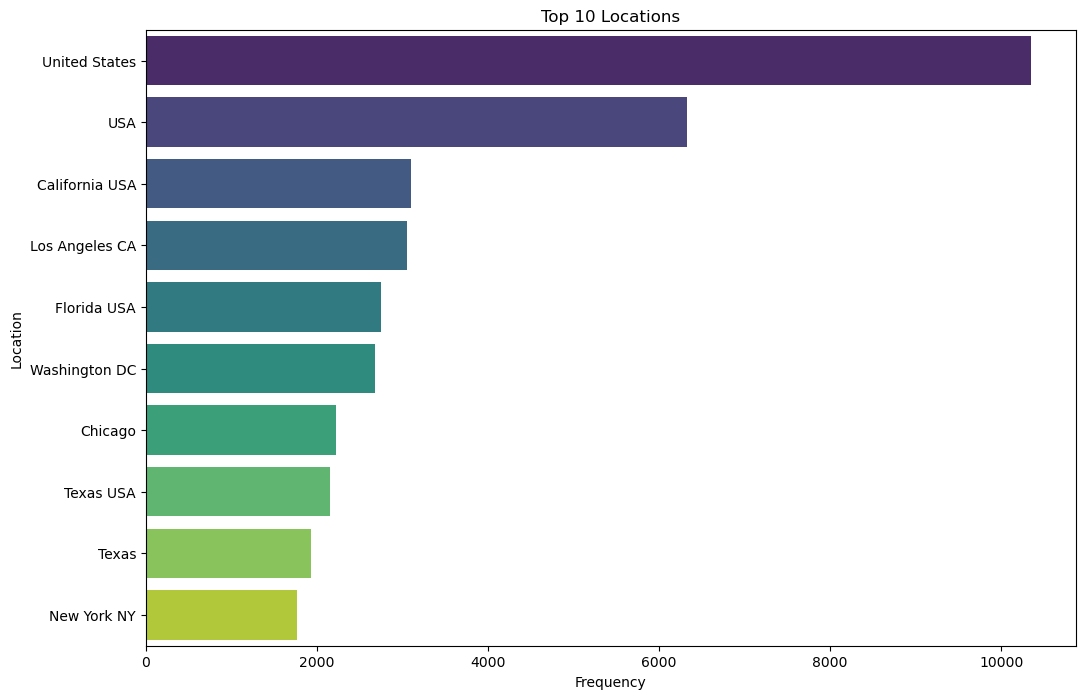

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

location_counts_df = location_counts.reset_index()
location_counts_df.columns = ['location', 'count']

In [66]:
location_counts_df['count'].sum()

210147

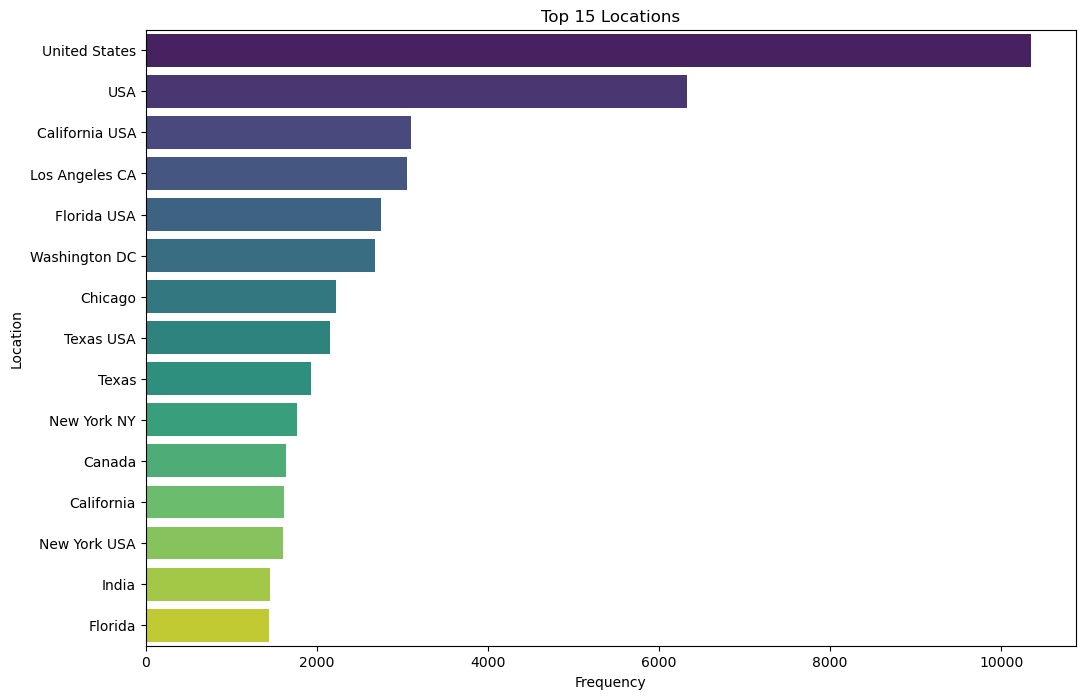

In [63]:
top_n = 15
top_locations = location_counts_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='location', data=top_locations, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title(f'Top {top_n} Locations')
plt.show()

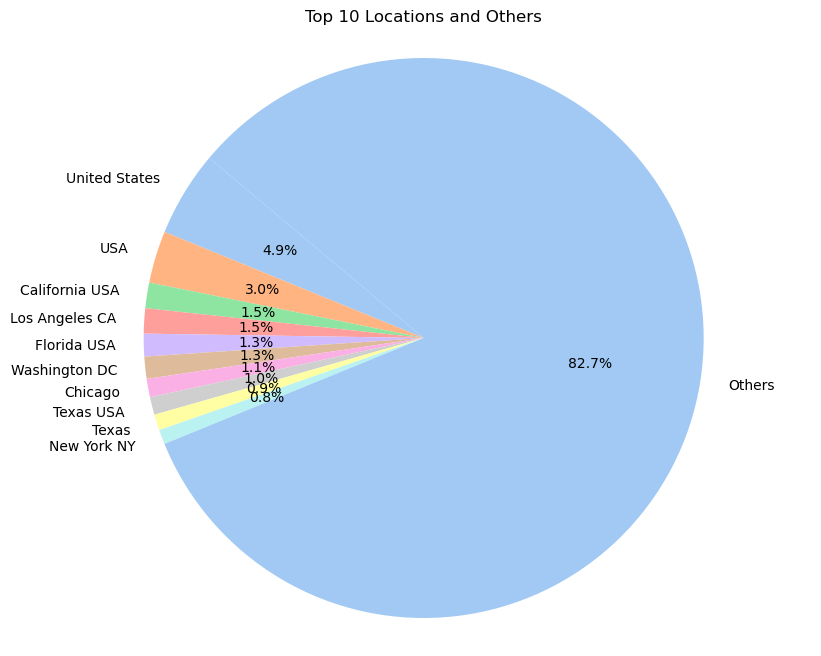

In [64]:
# Get the frequency of each hashtag
location_freq = df['extracted_locations'].value_counts()

# Prepare data for the pie chart
top_n = 10
top_locations = location_freq.head(top_n)
other_locations = pd.Series(location_freq.iloc[top_n:].sum(), index=['Others'])

# Combine the top hashtags with the "Others" category
pie_data = pd.concat([top_locations, other_locations])

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title(f'Top {top_n} Locations and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()